In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import random

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
abs_path = "/content/drive/MyDrive/atml"
sys.path.append(abs_path+"/datasets")

from datasets import load_dsprites, AddUniformNoise, AddGeneratedNoise, CustomDSpritesDataset
# from beta_vae import BetaVAEDSprites

# Fix seed 
torch.manual_seed(2)
random.seed(2)
np.random.seed(2)

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device

device(type='cuda')

In [12]:
transform = None
# transform = AddUniformNoise(-.1, .1)
transform = AddGeneratedNoise(abs_path + "/datasets/noisenet.pth", device)
dataset = CustomDSpritesDataset(load_dsprites(abs_path + "/datasets/dsprites.npz", False), transform=transform)

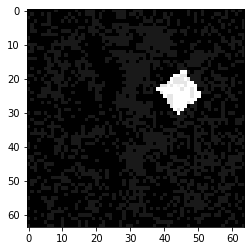

In [13]:
plt.imshow(dataset[5000].squeeze(0).cpu(), cmap='gray')

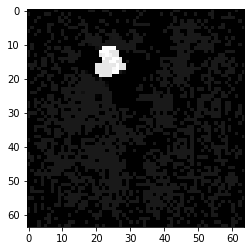

In [14]:
plt.imshow(dataset[500000].squeeze(0).cpu(), cmap='gray')

In [ ]:
a = dataset.sample_latent(5)
a

array([[ 0.,  0.,  3., 21.,  7., 11.],
       [ 0.,  1.,  0., 31.,  3., 19.],
       [ 0.,  0.,  2., 26.,  6.,  7.],
       [ 0.,  2.,  1., 20.,  4.,  6.],
       [ 0.,  2.,  3., 37., 10., 10.]])

In [ ]:
b = dataset.latent_to_index(a)
b

array([144619, 277619, 108743, 553094, 652618])

In [ ]:
dataset.indices_to_latent(b)

array([[ 0.,  0.,  3., 21.,  7., 11.],
       [ 0.,  1.,  0., 31.,  3., 19.],
       [ 0.,  0.,  2., 26.,  6.,  7.],
       [ 0.,  2.,  1., 20.,  4.,  6.],
       [ 0.,  2.,  3., 37., 10., 10.]])